In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fbm import FBM
from scipy.optimize import minimize

# Simulation parameters
n = 1000       # number of time steps
T = 1.0        # total time
dt = T / n     # time increment
H_true = 0.1   # true Hurst exponent (rough volatility: H < 0.5)

# Simulate a fractional Brownian motion (fBm) path
fbm_sim = FBM(n=n, hurst=H_true, length=T, method='daviesharte')
vol_path = fbm_sim.fbm()

# Compute empirical variance of increments for various lags
def empirical_variance(path, lag):
    # Compute variance of differences with a given lag
    increments = path[lag:] - path[:-lag]
    return np.var(increments)

lags = np.arange(1, 20)  # consider lags from 1 to 19
emp_var = np.array([empirical_variance(vol_path, lag) for lag in lags])

In [2]:
# Var(X_{t+lag} - X_t) = sigma^2 * (lag * dt)^(2H)
def theoretical_variance(lags, H, sigma=1.0):
    return sigma**2 * (lags * dt)**(2 * H)

def loss_function(H_est):
    model_var = theoretical_variance(lags, H_est[0])
    return np.sum((emp_var - model_var)**2)

True Hurst exponent: 0.1
Calibrated Hurst exponent: 0.09662475078141068


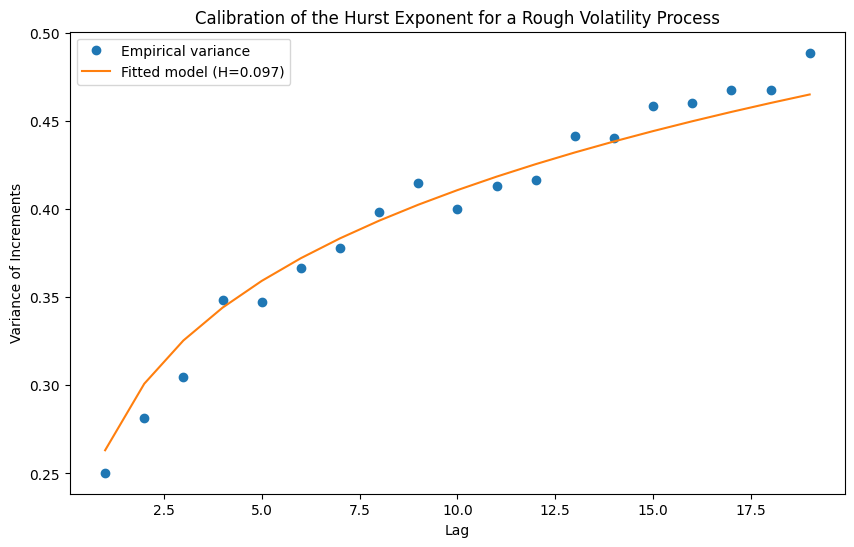

In [3]:
result = minimize(loss_function, x0=[0.2], bounds=[(0.01, 0.5)])
H_calibrated = result.x[0]

print("True Hurst exponent:", H_true)
print("Calibrated Hurst exponent:", H_calibrated)

# Plot the empirical variance and fitted theoretical model
plt.figure(figsize=(10, 6))
plt.plot(lags, emp_var, 'o', label='Empirical variance')
plt.plot(lags, theoretical_variance(lags, H_calibrated), label=f'Fitted model (H={H_calibrated:.3f})')
plt.xlabel('Lag')
plt.ylabel('Variance of Increments')
plt.title('Calibration of the Hurst Exponent for a Rough Volatility Process')
plt.legend()
plt.show()